In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

In [8]:
def load_data(num_words=10000, maxlen=200):
    """
    Load the IMDB dataset from Keras and preprocess it for sentiment analysis.
    
    Args:
    num_words (int): Maximum number of words to keep, based on word frequency.
    maxlen (int): Maximum length of each sequence.
    
    Returns:
    tuple: Processed training and testing data and labels.
    """
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
    X_train = pad_sequences(X_train, maxlen=maxlen)
    X_test = pad_sequences(X_test, maxlen=maxlen)
    
    return X_train, y_train, X_test, y_test


In [9]:
def build_model(max_words, max_len, embedding_dim=50, rnn_units=64):
    """
    Build and compile the RNN model.
    
    Args:
    max_words (int): Size of the vocabulary.
    max_len (int): Maximum length of input sequences.
    embedding_dim (int): Dimensionality of the embedding layer.
    rnn_units (int): Number of units in the RNN layer.
    
    Returns:
    keras.Model: Compiled RNN model.
    """
    model = Sequential([
        Embedding(max_words, embedding_dim, input_length=max_len),
        SimpleRNN(rnn_units),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [10]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    """
    Train the RNN model.
    
    Args:
    model (keras.Model): The compiled RNN model.
    X_train, y_train: Training data and labels.
    X_val, y_val: Validation data and labels.
    epochs (int): Number of training epochs.
    batch_size (int): Batch size for training.
    
    Returns:
    keras.callbacks.History: Training history.
    """
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)
    
    return history


In [11]:
def plot_history(history):
    """
    Plot training and validation accuracy and loss.
    
    Args:
    history (keras.callbacks.History): Training history object.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 83s 5us/step


c:\Users\gurup\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.5548 - loss: 0.6808 - val_accuracy: 0.5534 - val_loss: 0.7296
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.6921 - loss: 0.5858 - val_accuracy: 0.5552 - val_loss: 0.7636
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7684 - loss: 0.4826 - val_accuracy: 0.6442 - val_loss: 0.6306
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.8279 - loss: 0.3977 - val_accuracy: 0.7377 - val_loss: 0.5640
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8941 - loss: 0.2582 - val_accuracy: 0.5975 - val_loss: 0.7270
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.8173 - loss: 0.4008 - val_accuracy: 0.6152 - val_loss: 0.7478
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8626 - loss: 0.3189 - val_accuracy: 0.6149 - val_loss: 0.8213
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8984 - loss: 0.2542 - 

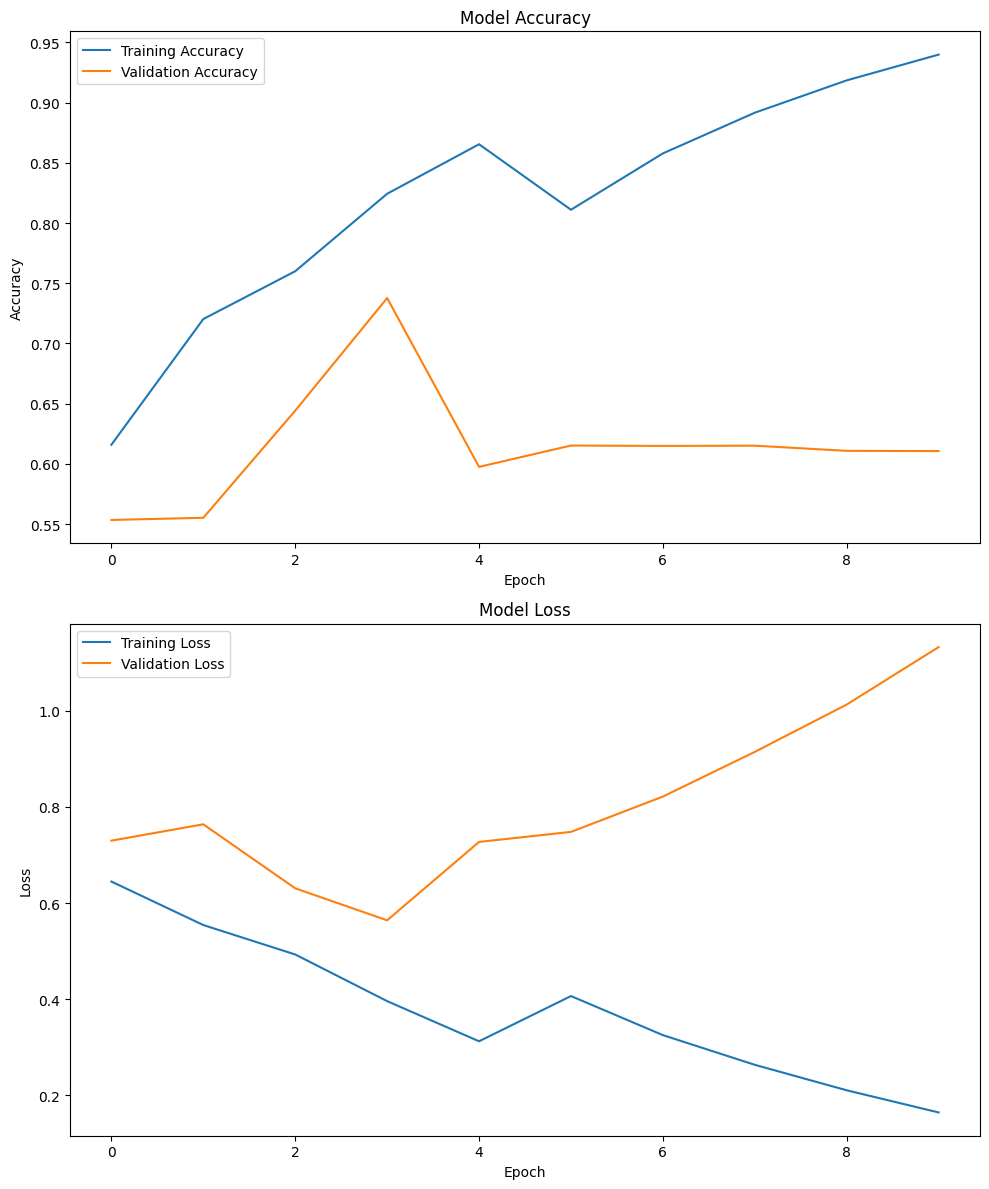

In [12]:
def main():
    # Load and preprocess data
    X_train, y_train, X_test, y_test = load_data()
    
    # Split the training data to create a validation set
    val_samples = 10000
    X_val = X_train[:val_samples]
    y_val = y_train[:val_samples]
    X_train = X_train[val_samples:]
    y_train = y_train[val_samples:]
    
    # Build the model
    max_words = 10000
    max_len = 200
    model = build_model(max_words, max_len)
    
    # Print model summary
    model.summary()
    
    # Train the model
    history = train_model(model, X_train, y_train, X_val, y_val)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}")
    
    # Plot training history
    plot_history(history)

if __name__ == "__main__":
    main()